# Final visualizations for the dissertations

## Objective

## Steps

## 1. File with information about ICO

In [1]:
import pandas as pd
import os
import re
import pytz
from datetime import datetime, timedelta
import plotly.graph_objects as go


In [2]:
df_info = pd.read_csv('lista_ico_2020-08-17_tab3.csv', sep=',')

In [3]:
df_info.head()

ico                                      adress  fraud  start_date  \
0       0X  0xe41d2489571d322189246dafa5ebde1f4699f498      0  2017-08-11   
1   0XCERT  0x83e2be8d114f9661221384b3a50d24b96a5653f5      1  2018-06-26   
2     4NEW  0x241ba672574a78a3a604cdd0a94429a73a84a324      1  2018-08-20   
3  ABULABA  0xd938137e6d96c72e4a6085412ada2dad78ff89c4      1  2018-04-19   
4     AELF  0xbf2179859fc6d5bee9bf9158632dc51678a4100e      0  2017-12-18   

  market_start_date  diff_days  market_days size_ok price  market_cap  \
0        2017-08-15          4         1124     NaN   NaN        45.0   
1        2018-07-11         15          794       x   NaN         NaN   
2        2018-08-20          0          754       x   NaN         NaN   
3        2018-12-16        241          636     NaN     x         NaN   
4        2017-12-21          3          996     NaN   NaN       154.0   

  o_concur  biggest_holder  exchange  contract date_analysis code site  \
0        x               2         6        14    2018-02-11  NaN  NaN   
1      NaN              12         2         0    2019-01-07    x    x   
2      NaN              50         7         0    2019-02-16    x  NaN   
3      NaN              13         7        41    2019-06-14    x  NaN   
4        x              13        10         0    2018-06-19  NaN  NaN   

  social_media  
0          NaN  
1            x  
2          NaN  
3          NaN  
4          NaN

## 3. Load data from .py file
For each key inside the dictionary, the arrays correspond to the following series:

0. array_daily_transactions
1. array_perc_new_holders
2. array_biggest_holder
3. array_newbiers
4. array_gas_ratio


In [4]:
from dict_ico_array_length_20 import dict_ico_len_20

In [5]:
for ico in dict_ico_len_20.keys():
    for index, array in enumerate(dict_ico_len_20.get(ico)):
        if len(array) != 20:
            print(ico, index, len(array))

AIDCOIN 0 7
AIDCOIN 1 7
AIDCOIN 2 7
AIDCOIN 3 8
AIDCOIN 4 8
ALLME 0 17
ATLAS 4 19
BELANCE 0 18
BLOCKMALL 0 19
BLOCKMALL 1 19
BLOCKMALL 2 19
BLOCKMALL 4 18
CELSIUS 4 19
CLOUDWITHME 4 1
COFOUND 4 11
CRYPTONIAPOKER 0 19
DECENTURION 4 10
DIAM 0 17
EMPOWR 4 18
ETHEREUMCASHPRO 4 19
EXIMCHAIN 0 15
EXIMCHAIN 1 14
EXIMCHAIN 2 14
EXIMCHAIN 3 15
EXIMCHAIN 4 15
FACEBLOCK 4 9
FANTOM 4 2
FIDELIUM 4 13
HERONODE 4 14
HONEYSHARECOIN 0 17
ICON 0 1
ICON 1 1
ICON 2 1
ICON 3 2
ICON 4 1
INDAHASH 0 5
INDAHASH 1 4
INDAHASH 2 4
INDAHASH 3 5
INDAHASH 4 5
KYCLEGAL 4 10
LOLIGO 0 8
MONEYTOKEN 0 19
MONEYTOKEN 1 18
MONEYTOKEN 2 18
MONEYTOKEN 3 19
MONEYTOKEN 4 4
MULTILEVEL 0 16
PLANETMOBILETOKEN 0 17
PROMETEUS 0 19
QUANT 4 18
SENSE 4 19
SHARERING 0 1
SINGULARITYNET 0 2
SINGULARITYNET 1 1
SINGULARITYNET 2 1
SINGULARITYNET 3 2
SINGULARITYNET 4 2
SOCIALMEDIAPAY 0 18
SPARKSTER 0 11
SPARKSTER 1 10
SPARKSTER 2 10
SPARKSTER 3 11
SPARKSTER 4 1


## 3. Load data from .py file
For each key inside the dictionary, the arrays correspond to the following series:

0. array_daily_transactions
1. array_perc_new_holders
2. array_biggest_holder
3. array_newbiers
4. array_gas_ratio


## 4. Filter data for size equals to 20

In [6]:
dict_perc_transactions_20 = {k:v[0] for k,v in dict_ico_len_20.items() if len(v[0]) == 20}
dict_perc_new_holders_20 = {k:v[1] for k,v in dict_ico_len_20.items() if len(v[1]) == 20}
dict_perc_big_holder_20 = {k:v[2] for k,v in dict_ico_len_20.items() if len(v[2]) == 20}
dict_perc_newbiers_20 = {k:v[3] for k,v in dict_ico_len_20.items() if len(v[3]) == 20}
dict_gas_ratio = {k:v[4] for k,v in dict_ico_len_20.items() if len(v[4]) == 20}

In [7]:
df_transactions_20 = pd.DataFrame(dict_perc_transactions_20).T
df_new_holders_20 = pd.DataFrame(dict_perc_new_holders_20).T
df_big_holder_20 = pd.DataFrame(dict_perc_big_holder_20).T
df_newbiers_20 = pd.DataFrame(dict_perc_newbiers_20).T
df_gasratio_20 = pd.DataFrame(dict_gas_ratio).T

In [8]:
print(df_transactions_20.shape)
print(df_new_holders_20.shape)
print(df_big_holder_20.shape)
print(df_newbiers_20.shape)
print(df_gasratio_20.shape)

(222, 20)
(233, 20)
(233, 20)
(234, 20)
(219, 20)


## 5. Plotting the dataset

In [9]:
import plotly.express as px

In [10]:
df_info.head()

ico                                      adress  fraud  start_date  \
0       0X  0xe41d2489571d322189246dafa5ebde1f4699f498      0  2017-08-11   
1   0XCERT  0x83e2be8d114f9661221384b3a50d24b96a5653f5      1  2018-06-26   
2     4NEW  0x241ba672574a78a3a604cdd0a94429a73a84a324      1  2018-08-20   
3  ABULABA  0xd938137e6d96c72e4a6085412ada2dad78ff89c4      1  2018-04-19   
4     AELF  0xbf2179859fc6d5bee9bf9158632dc51678a4100e      0  2017-12-18   

  market_start_date  diff_days  market_days size_ok price  market_cap  \
0        2017-08-15          4         1124     NaN   NaN        45.0   
1        2018-07-11         15          794       x   NaN         NaN   
2        2018-08-20          0          754       x   NaN         NaN   
3        2018-12-16        241          636     NaN     x         NaN   
4        2017-12-21          3          996     NaN   NaN       154.0   

  o_concur  biggest_holder  exchange  contract date_analysis code site  \
0        x               2         6        14    2018-02-11  NaN  NaN   
1      NaN              12         2         0    2019-01-07    x    x   
2      NaN              50         7         0    2019-02-16    x  NaN   
3      NaN              13         7        41    2019-06-14    x  NaN   
4        x              13        10         0    2018-06-19  NaN  NaN   

  social_media  
0          NaN  
1            x  
2          NaN  
3          NaN  
4          NaN

### Transactions

In [11]:
df_transactions_20.head()

0       1       2       3       4       5       6       7   \
0X       0.1956  0.3770  0.4623  0.5442  0.6657  0.7008  0.7290  0.7516   
0XCERT   0.3247  0.5239  0.5726  0.6013  0.6189  0.6950  0.7302  0.7687   
4NEW     0.4522  0.7306  0.7621  0.7935  0.8107  0.8212  0.8290  0.8438   
ABULABA  0.5221  0.5603  0.5771  0.6214  0.6351  0.6473  0.6611  0.6687   
AELF     0.0534  0.0648  0.0724  0.0815  0.0917  0.1060  0.1203  0.1311   

             8       9       10      11      12      13      14      15  \
0X       0.7791  0.8006  0.8222  0.8474  0.8613  0.8826  0.9020  0.9259   
0XCERT   0.7835  0.8190  0.8739  0.8847  0.9093  0.9337  0.9522  0.9618   
4NEW     0.8619  0.8722  0.8813  0.9018  0.9134  0.9293  0.9379  0.9512   
ABULABA  0.7160  0.7420  0.7664  0.7893  0.8000  0.8534  0.8824  0.8870   
AELF     0.1421  0.1534  0.1626  0.1727  0.1862  0.2044  0.2358  0.9036   

             16      17      18   19  
0X       0.9460  0.9691  0.9861  1.0  
0XCERT   0.9713  0.9769  0.9858  1.0  
4NEW     0.9698  0.9790  0.9934  1.0  
ABULABA  0.9115  0.9405  0.9695  1.0  
AELF     0.9231  0.9591  0.9810  1.0

In [77]:
df_transactions_20.loc['mean'] = df_transactions_20.mean(axis=0)

In [78]:
df_transactions_20.tail()

0         1         2         3         4         5   \
ZILLIQA   0.037700  0.238500  0.387100  0.445700  0.488400  0.529700   
ZPAY      0.414400  0.415400  0.468300  0.469200  0.497800  0.506600   
ZYNECOIN  0.468200  0.879000  0.885400  0.894900  0.894900  0.894900   
222       0.340229  0.456372  0.519102  0.563043  0.595255  0.625491   
mean      0.340229  0.456372  0.519102  0.563043  0.595255  0.625491   

                6         7         8         9         10       11        12  \
ZILLIQA   0.564600  0.591600  0.625500  0.674300  0.712700  0.74400  0.777600   
ZPAY      0.512200  0.514200  0.515800  0.516700  0.524500  0.52460  0.525400   
ZYNECOIN  0.939500  0.949000  0.949000  0.949000  0.971300  0.97450  0.974500   
222       0.650105  0.681064  0.710661  0.736678  0.763165  0.79052  0.815886   
mean      0.650105  0.681064  0.710661  0.736678  0.763165  0.79052  0.815886   

                13        14        15        16        17        18   19  
ZILLIQA   0.816200  0.852400  0.874100  0.900800  0.943000  0.974600  1.0  
ZPAY      0.526100  0.527100  0.527700  0.533800  0.998400  0.999400  1.0  
ZYNECOIN  0.980900  0.984100  0.987300  0.987300  0.990400  0.990400  1.0  
222       0.838468  0.869219  0.898124  0.922256  0.948064  0.975416  1.0  
mean      0.838468  0.869219  0.898124  0.922256  0.948064  0.975416  1.0

In [12]:
list_means = [df_transactions_20[col].mean() for col in df_transactions_20.columns]

In [13]:
df_series_stack = pd.DataFrame(df_transactions_20.iloc[:, :-1].stack()).reset_index().rename(columns={'level_1':'days', 0: 'series'})

In [14]:
df_series_stack.head()

level_0  days  series
0      0X     0  0.1956
1      0X     1  0.3770
2      0X     2  0.4623
3      0X     3  0.5442
4      0X     4  0.6657

In [15]:
df_series_stack.rename(columns={'level_0':'ico'},inplace=True)

In [79]:
df_transactions_20_t = df_transactions_20.T
df_transactions_20_t.head()

0X  0XCERT    4NEW  ABULABA    AELF   AERGO  AIRSWAP  AKROPOLIS  \
0  0.1956  0.3247  0.4522   0.5221  0.0534  0.0762   0.2881     0.5163   
1  0.3770  0.5239  0.7306   0.5603  0.0648  0.1430   0.3863     0.6179   
2  0.4623  0.5726  0.7621   0.5771  0.0724  0.4038   0.3882     0.6533   
3  0.5442  0.6013  0.7935   0.6214  0.0815  0.4792   0.3894     0.7195   
4  0.6657  0.6189  0.8107   0.6351  0.0917  0.5101   0.3904     0.7383   

   AMPLEFORTH  ANATOMIA  ...    VITE  WALTONCHAIN  WANCHAIN     WAX  \
0      0.3922    0.2717  ...  0.2377       0.4455    0.3089  0.0792   
1      0.5640    0.4528  ...  0.4119       0.4532    0.4572  0.1173   
2      0.6094    0.5855  ...  0.4781       0.4648    0.5104  0.1654   
3      0.6409    0.6905  ...  0.5469       0.5174    0.5857  0.2933   
4      0.6692    0.7741  ...  0.5934       0.6048    0.6222  0.3400   

   WAYKICHAIN  ZILLIQA    ZPAY  ZYNECOIN       222      mean  
0      0.0618   0.0377  0.4144    0.4682  0.340229  0.340229  
1      0.3008   0.2385  0.4154    0.8790  0.456372  0.456372  
2      0.5758   0.3871  0.4683    0.8854  0.519102  0.519102  
3      0.6285   0.4457  0.4692    0.8949  0.563043  0.563043  
4      0.6589   0.4884  0.4978    0.8949  0.595255  0.595255  

[5 rows x 224 columns]

In [43]:
df_info.loc[df_info.ico == '0XCERT']['fraud'].values[0]

1

In [29]:
df_transactions_20_t.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [89]:
fraud_dict = {1: 'fraud', 0:'success'}
color_dict = {1: 'rgba(152, 0, 0, .1)', 0: 'rgba(0,0,255,.1)'}

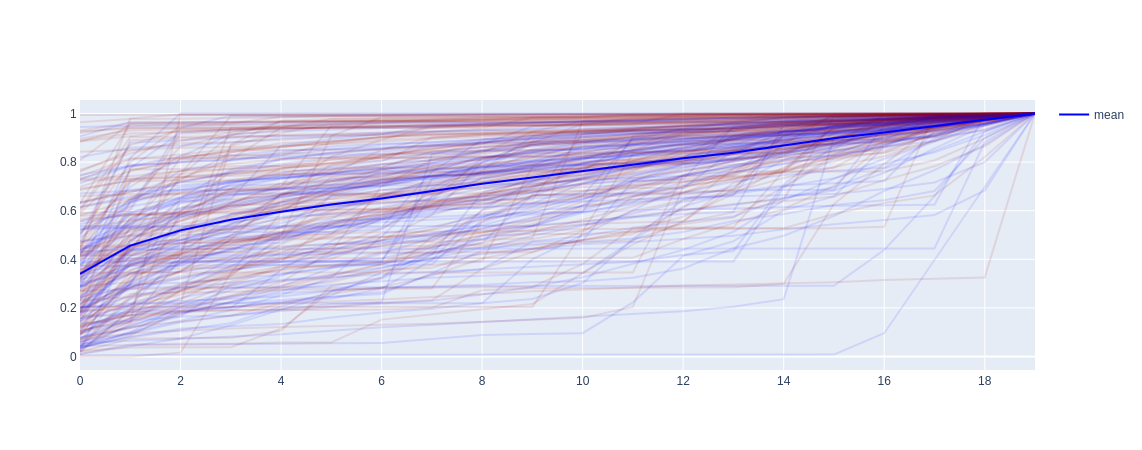

In [90]:
fig = go.Figure()
for ico in df_transactions_20_t.columns[:-3]:
    is_fraud = df_info.loc[df_info.ico ==ico]['fraud'].values[0]
    fig.add_trace(go.Scatter(x=df_transactions_20_t.index.values, y=df_transactions_20_t[ico], #opacity=0.2,
                            showlegend=False,
                            legendgroup = fraud_dict.get(is_fraud),
                            marker_color=color_dict.get(is_fraud)))
fig.add_trace(go.Scatter(x=df_transactions_20_t.index.values, y=df_transactions_20_t['mean'], #opacity=0.2,
                            name='mean',
                            legendgroup ='success',
                            marker_color='rgba(0,0,255,1.0)',
                         showlegend=True             
             ))
                            
fig.show()


help(go.Scatter)

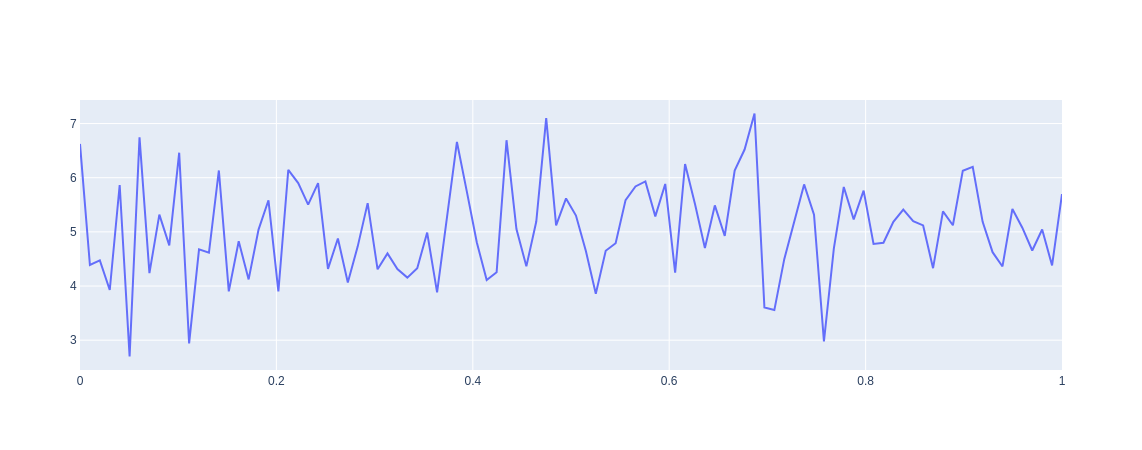

In [32]:

# Create random data with numpy
import numpy as np
np.random.seed(1)

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='lines',
                    name='lines'))

help(px.line)

In [16]:
df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')
df_series_stack

ico  days  series  fraud
0           0X     0  0.1956      0
1           0X     1  0.3770      0
2           0X     2  0.4623      0
3           0X     3  0.5442      0
4           0X     4  0.6657      0
...        ...   ...     ...    ...
4213  ZYNECOIN    14  0.9841      1
4214  ZYNECOIN    15  0.9873      1
4215  ZYNECOIN    16  0.9873      1
4216  ZYNECOIN    17  0.9904      1
4217  ZYNECOIN    18  0.9904      1

[4218 rows x 4 columns]

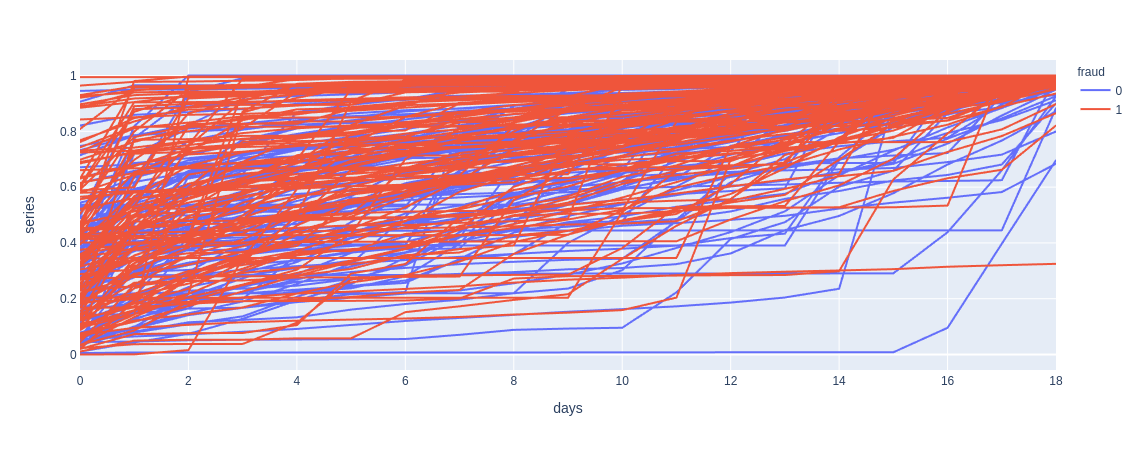

In [17]:
fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()

### New holders

In [44]:
df_series_stack = pd.DataFrame(df_new_holders_20.iloc[:, :-1].stack()).reset_index().rename(columns={'level_1':'days', 0: 'series'})

In [45]:
df_series_stack.head()

level_0  days  series
0      0X     0  0.2656
1      0X     1  0.4122
2      0X     2  0.4955
3      0X     3  0.5804
4      0X     4  0.6876

In [46]:
df_series_stack.rename(columns={'level_0':'ico'},inplace=True)

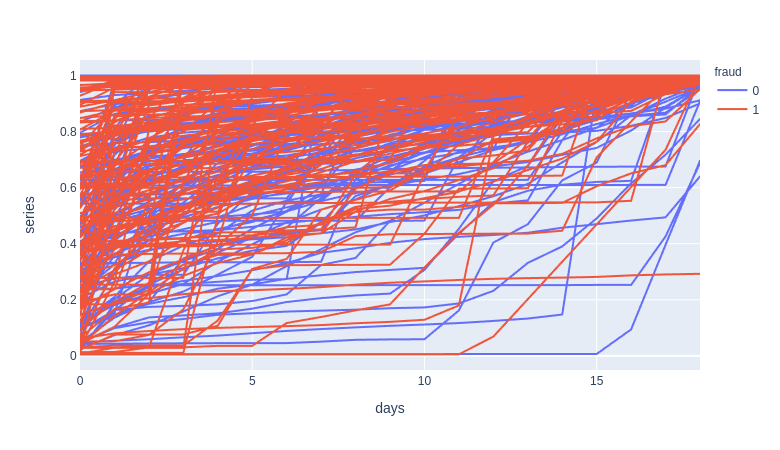

In [47]:


df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')

fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()

### Biggest Holder

In [78]:
df_series_stack = pd.DataFrame(df_big_holder_20.stack()).reset_index().rename(columns={'level_1':'days', 0: 'series'})

In [79]:
df_series_stack.head()

level_0  days  series
0      0X     0  0.2139
1      0X     1  0.0322
2      0X     2  0.0322
3      0X     3  0.0360
4      0X     4  0.0332

In [80]:
df_series_stack.rename(columns={'level_0':'ico'},inplace=True)

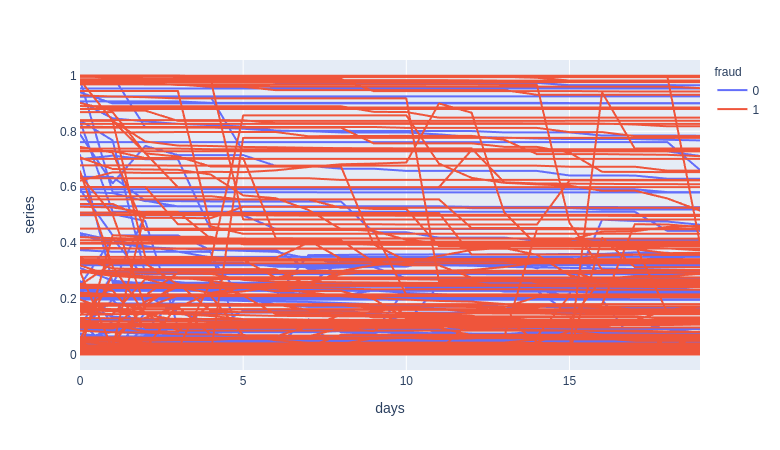

In [81]:
df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')

fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()

### Newbiers

In [74]:
df_series_stack = pd.DataFrame(df_newbiers_20.stack()).reset_index().rename(columns={'level_1':'days', 0: 'series'})

In [75]:
df_series_stack.head()

level_0  days  series
0      0X     0  0.6861
1      0X     1  0.4269
2      0X     2  0.4521
3      0X     3  0.2303
4      0X     4  0.2735

In [76]:
df_series_stack.rename(columns={'level_0':'ico'},inplace=True)

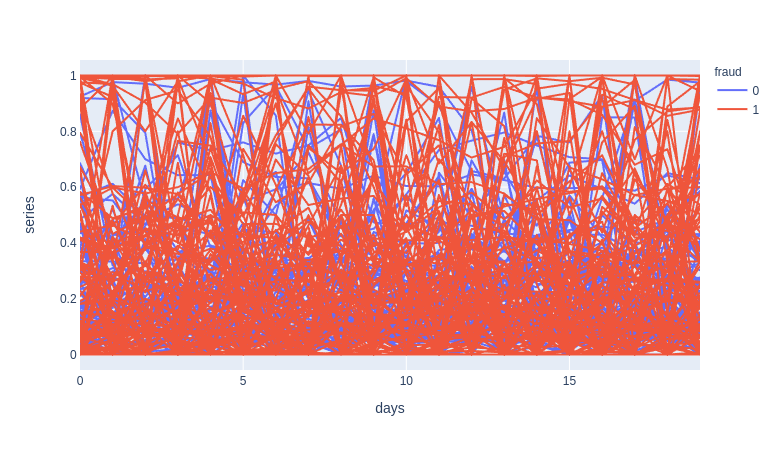

In [77]:
df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')

fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()

### Gas ratio

In [66]:
df_gasratio_20.shape

(219, 20)

In [70]:
df_series_stack = pd.DataFrame(df_gasratio_20.stack()).reset_index().rename(columns={'level_1':'days', 0: 'series'})

In [71]:
df_series_stack.rename(columns={'level_0':'ico'},inplace=True)

In [72]:
df_series_stack

ico  days  series
0           0X     0  0.5764
1           0X     1  0.2346
2           0X     2  0.2659
3           0X     3  0.3010
4           0X     4  0.2935
...        ...   ...     ...
4375  ZYNECOIN    15  1.0000
4376  ZYNECOIN    16  0.0000
4377  ZYNECOIN    17  0.0000
4378  ZYNECOIN    18  0.0000
4379  ZYNECOIN    19  1.0000

[4380 rows x 3 columns]

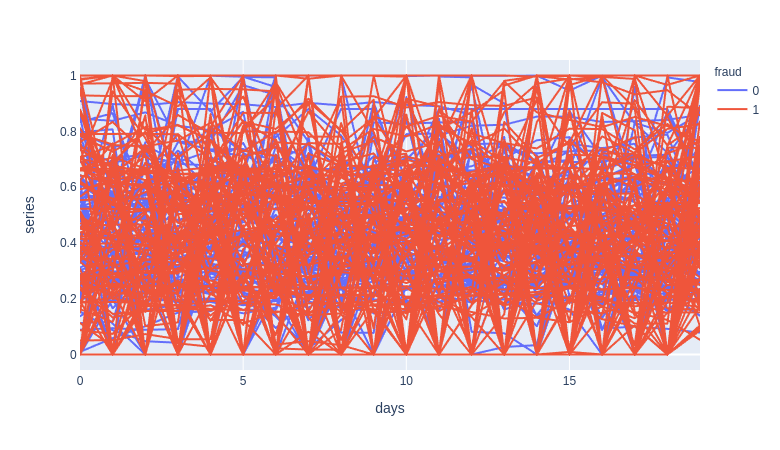

In [73]:
df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')

fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()

## 6. Dataset for training

In [60]:
df_training_transactions = df_transactions_20.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_transactions.set_index('ico', inplace=True)

In [61]:
df_training_new_holders = df_new_holders_20.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_new_holders.set_index('ico', inplace=True)

In [62]:
df_training_big_holder = df_big_holder_20.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_big_holder.set_index('ico', inplace=True)

In [63]:
df_training_newbiers = df_newbiers_20.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_newbiers.set_index('ico', inplace=True)

In [64]:
df_training_gasratio = df_gasratio_20.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_gasratio.set_index('ico', inplace=True)

## Importing `ICODeepTraining`

In [65]:
from ico_parser import ICODeepTraining

### 7.1 Define the model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [37]:
model_mlp = Sequential()
model_mlp.add(Dense(20, input_dim=20, activation='relu'))
model_mlp.add(Dense(30, activation='relu'))
model_mlp.add(Dense(20, activation='relu'))
model_mlp.add(Dense(10, activation='relu'))
model_mlp.add(Dense(1, activation='sigmoid'))

In [38]:
ico_training = ICODeepTraining(df_training_transactions.iloc[:, :-1],
                               df_training_transactions.iloc[:, -1],
                               model_mlp,
                               ann_type='mlp',
                               size_array=60)
                               
ico_training.split_train_test()
ico_training.model_summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 1,891
Trainable params: 1,891
Non-trainable params: 0
_________________________________________________________________


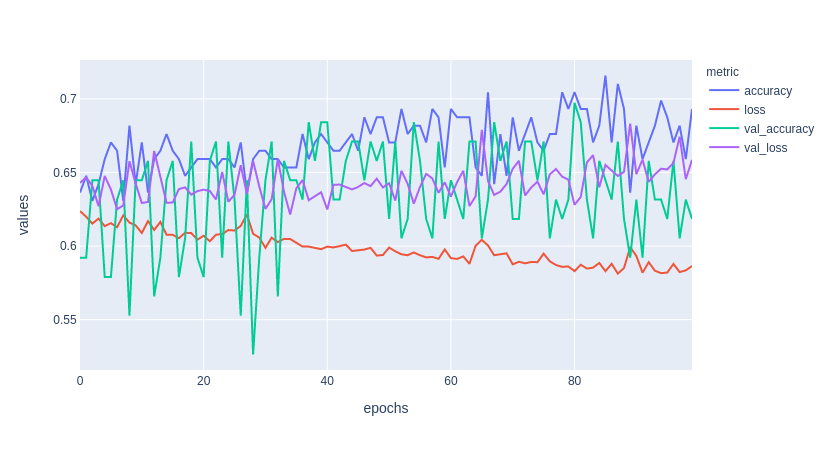

In [41]:
ico_training.train_network(loss='binary_crossentropy', 
                      optimizer='adam',
                      metrics=['accuracy'] ,
                      epochs=100,
                      verbose=0, 
                      batch_size=32)

ico_training.plot_training()

## CNN
https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [42]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=(20, 1)))
model_cnn.add(Conv1D(filters=8, kernel_size=3, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(224, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

In [43]:
ico_training = ICODeepTraining(df_training_gasratio.iloc[:, :-1],
                               df_training_gasratio.iloc[:, -1],
                               model_cnn,
                               ann_type='cnn',
                               size_array=20)
                               
ico_training.split_train_test()
ico_training.model_summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 18, 8)             32        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 8)             200       
_________________________________________________________________
dropout (Dropout)            (None, 16, 8)             0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 8)              0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 224)               14560     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

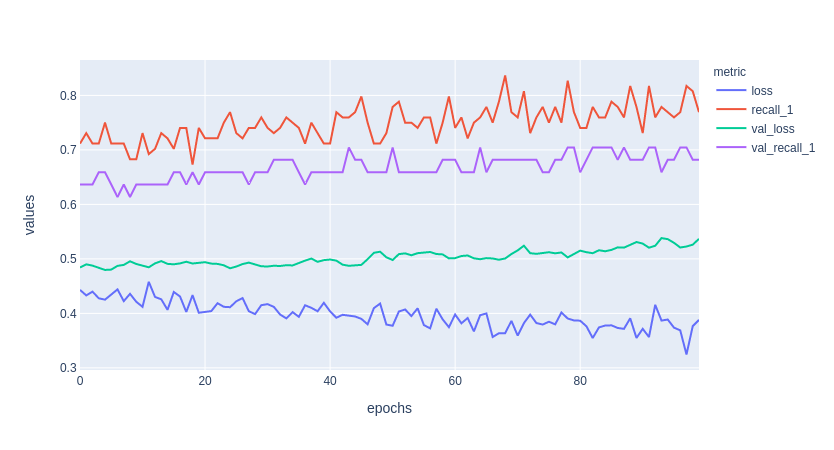

In [45]:
ico_training.train_network(loss='binary_crossentropy', 
                      optimizer='adam',
                      metrics=[Recall()] ,
                      epochs=100,
                      verbose=0, 
                      batch_size=32)
ico_training.plot_training()

### LSTM
Based on the following articles:
1. https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
2. https://medium.com/@shivajbd/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e
3. https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/

In [46]:
import numpy
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

### Using the framework for LSTM

In [51]:
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(20, 1), return_sequences=True))
model_lstm.add(Dense(60, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

In [52]:
ico_training = ICODeepTraining(df_training_gasratio.iloc[:, :-1],
                               df_training_gasratio.iloc[:, -1],
                               model_lstm,
                               ann_type='lstm',
                               size_array=60)
                               
ico_training.split_train_test()
ico_training.model_summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 100)           40800     
_________________________________________________________________
dense_14 (Dense)             (None, 20, 60)            6060      
_________________________________________________________________
dense_15 (Dense)             (None, 20, 1)             61        
Total params: 46,921
Trainable params: 46,921
Non-trainable params: 0
_________________________________________________________________


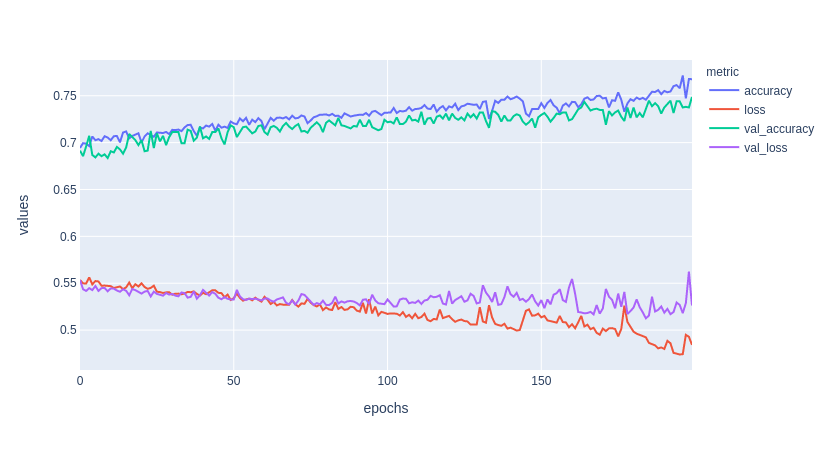

In [54]:
ico_training.train_network(loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy'],#, Recall()],
        epochs=200,
        verbose=0,
        batch_size=32)
ico_training.plot_training()